In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [5]:
import eda_helper_functions

In [9]:
file_path= r"C:\Users\win\Desktop\flights_price_sagemaker\data\train.csv"
train= pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-06,Kolkata,Banglore,17:00:00,23:35:00,395,1.0,In-flight meal not included,10703
1,Vistara,2019-04-06,Banglore,Delhi,09:45:00,12:35:00,170,0.0,No Info,5613
2,Jet Airways,2019-03-06,Delhi,Cochin,11:30:00,04:25:00,1015,1.0,No Info,15764
3,Multiple Carriers,2019-06-12,Delhi,Cochin,14:00:00,01:30:00,690,1.0,No Info,13377
4,Indigo,2019-06-21,Chennai,Kolkata,11:35:00,14:00:00,145,0.0,No Info,3858
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-05-01,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No check-in baggage included,3841
636,Air India,2019-03-18,Banglore,New Delhi,08:50:00,23:25:00,875,2.0,No Info,11728
637,Indigo,2019-05-18,Kolkata,Banglore,22:15:00,00:50:00,155,0.0,No Info,4804
638,Vistara,2019-06-21,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,11982


In [11]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [13]:
train= train.assign(**{
        col: pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
        for col in ["date_of_journey","dep_time","arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [17]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,621.578125,0.779687,8904.535938
std,512.562231,0.659511,5129.900279
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5053.500000
50%,455.000000,1.000000,7930.500000
75%,930.000000,1.000000,12373.000000
max,2345.000000,3.000000,79512.000000


In [19]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,226,261,261,340.0,495


In [21]:
train.describe(include="O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,9,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,226,261,261,495


In [23]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [29]:
forest =IsolationForest(n_estimators=10,random_state=42)

In [31]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
    .query("outlier == -1")
)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-05-06,Kolkata,Banglore,2024-06-19 17:00:00,2024-06-19 23:35:00,395,1.0,In-flight meal not included,10703,-1
4,Indigo,2019-06-21,Chennai,Kolkata,2024-06-19 11:35:00,2024-06-19 14:00:00,145,0.0,No Info,3858,-1
10,Jet Airways,2019-06-24,Delhi,Cochin,2024-06-19 05:30:00,2024-06-19 04:25:00,1375,2.0,No Info,13014,-1
11,Jet Airways,2019-05-21,Kolkata,Banglore,2024-06-19 06:30:00,2024-06-19 04:40:00,1330,1.0,In-flight meal not included,8586,-1
12,Air India,2019-05-09,Kolkata,Banglore,2024-06-19 14:30:00,2024-06-19 08:55:00,1105,2.0,No Info,14214,-1
...,...,...,...,...,...,...,...,...,...,...,...
618,Vistara,2019-06-06,Kolkata,Banglore,2024-06-19 17:00:00,2024-06-19 18:50:00,1550,1.0,No Info,8820,-1
626,Vistara,2019-06-09,Kolkata,Banglore,2024-06-19 17:00:00,2024-06-19 18:50:00,1550,1.0,No Info,9135,-1
630,Indigo,2019-04-18,Delhi,Cochin,2024-06-19 05:35:00,2024-06-19 08:50:00,195,0.0,No Info,6015,-1
633,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-19 19:10:00,2024-06-19 19:45:00,1475,2.0,In-flight meal not included,8834,-1


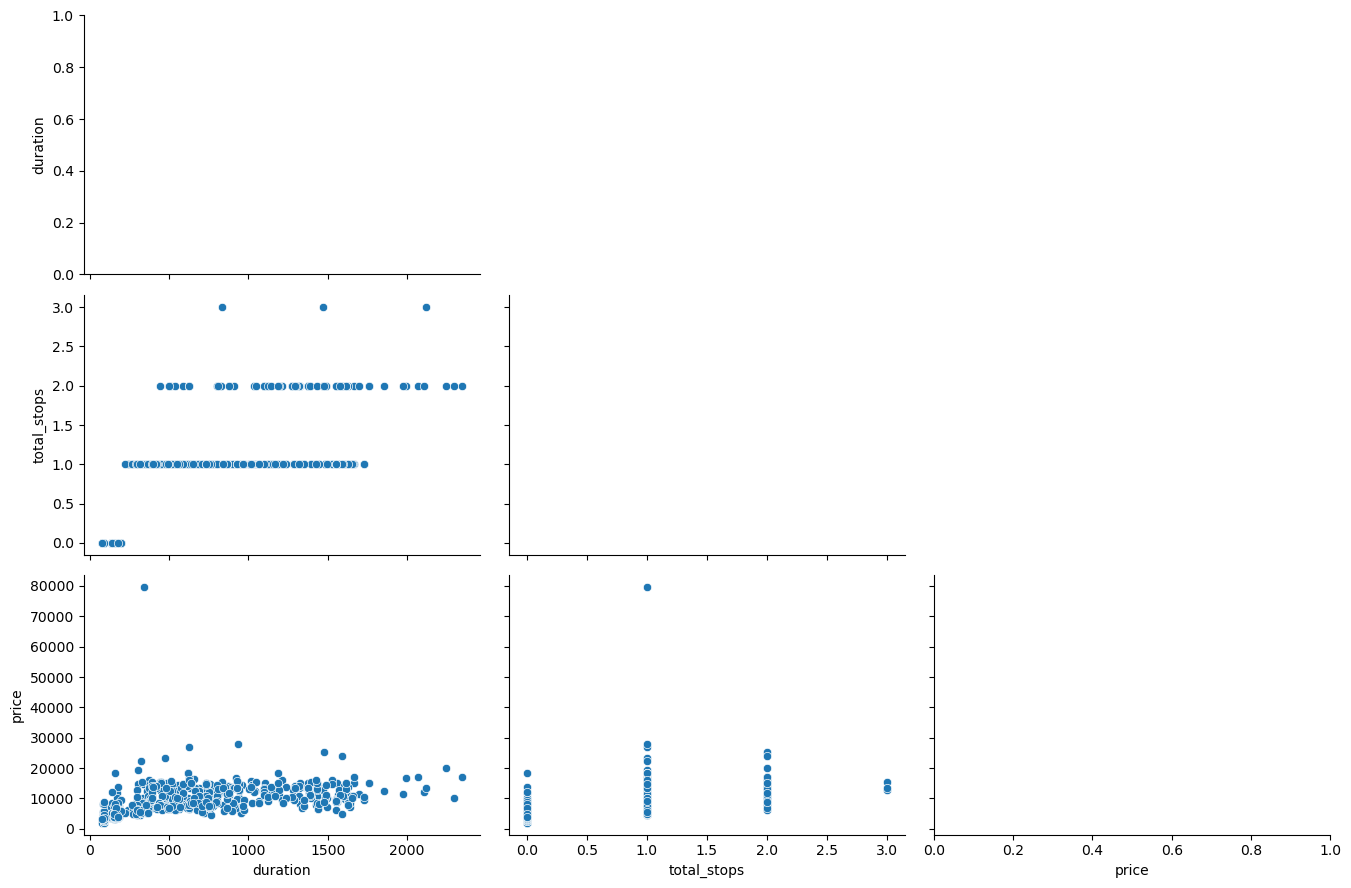

In [35]:
eda_helper_functions.pair_plots(train)

C:\Users\win\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


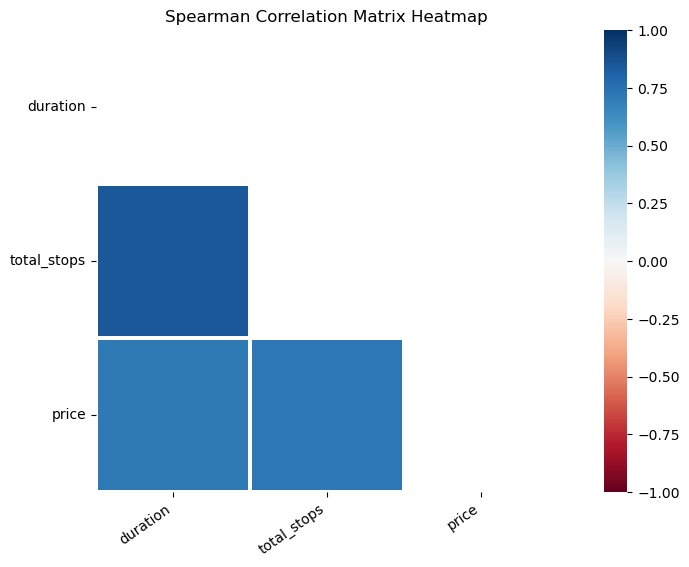

In [37]:
eda_helper_functions.correlation_heatmap(train)

C:\Users\win\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


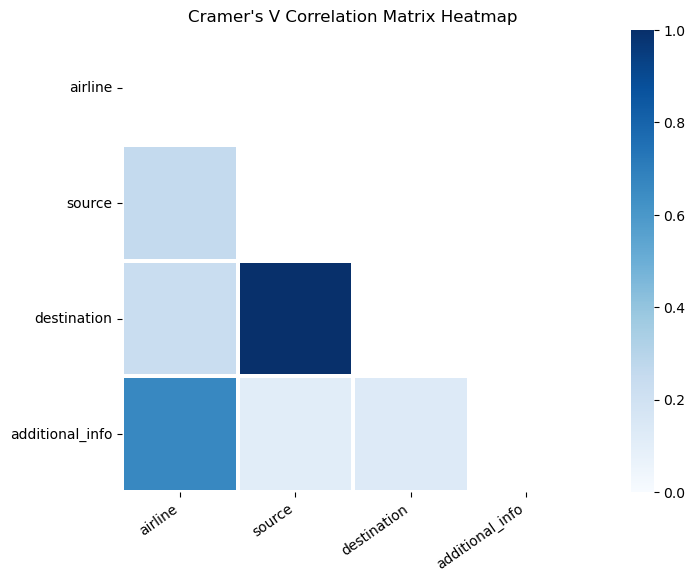

In [39]:
eda_helper_functions.cramersV_heatmap(train)

In [41]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [43]:
train.airline

0            Jet Airways
1                Vistara
2            Jet Airways
3      Multiple Carriers
4                 Indigo
             ...        
635             Spicejet
636            Air India
637               Indigo
638              Vistara
639             Spicejet
Name: airline, Length: 640, dtype: object

In [45]:
eda_helper_functions.cat_summary(train,"airline")

0            Jet Airways
1                Vistara
2            Jet Airways
3      Multiple Carriers
4                 Indigo
             ...        
635             Spicejet
636            Air India
637               Indigo
638              Vistara
639             Spicejet
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,226


,count,percentage
category,,
Jet Airways,226,0.353125
Indigo,132,0.206250
Air India,92,0.143750
Multiple Carriers,68,0.106250
Spicejet,62,0.096875
Vistara,32,0.050000
Air Asia,19,0.029687
Goair,8,0.012500
Jet Airways,1,0.001563


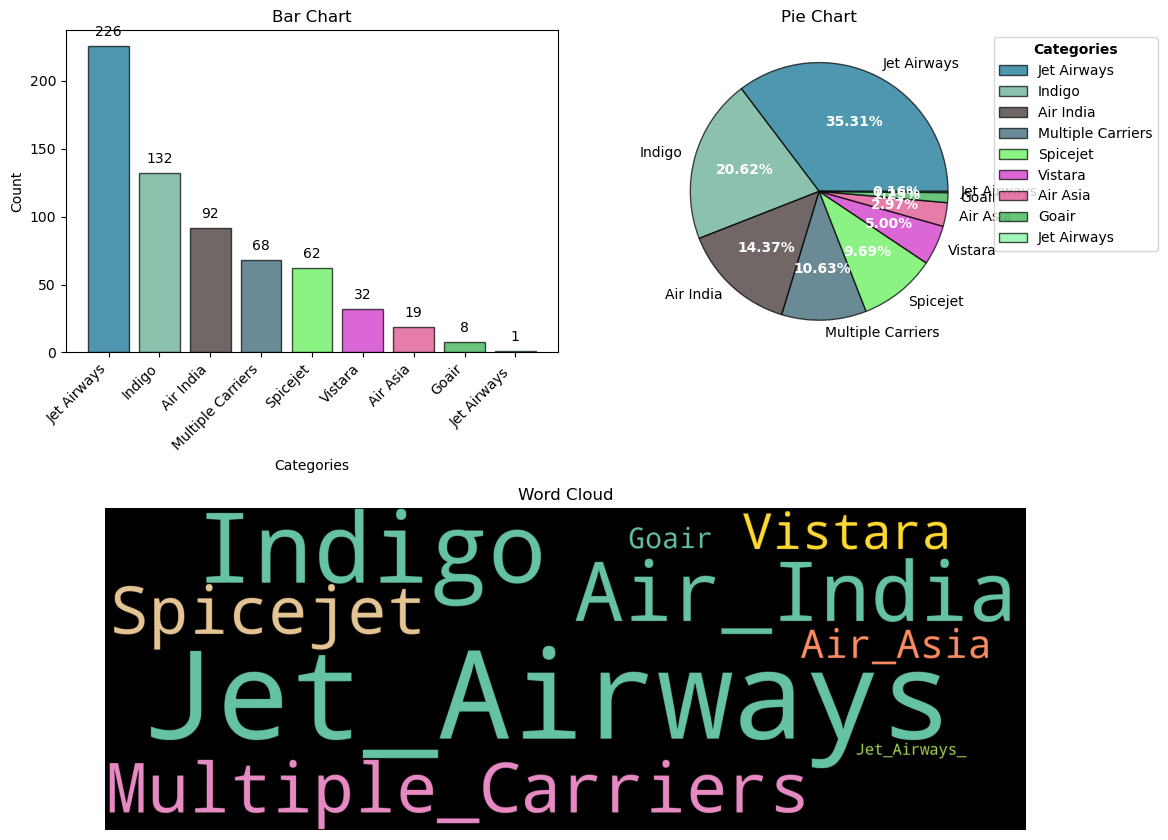

In [49]:
eda_helper_functions.cat_univar_plots(train,"airline")

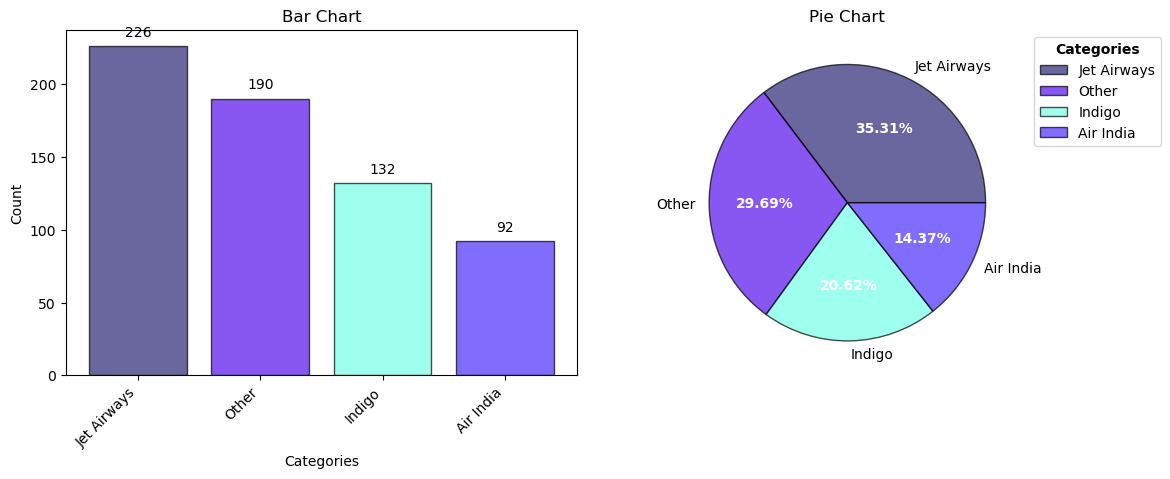

In [51]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False,k=3)

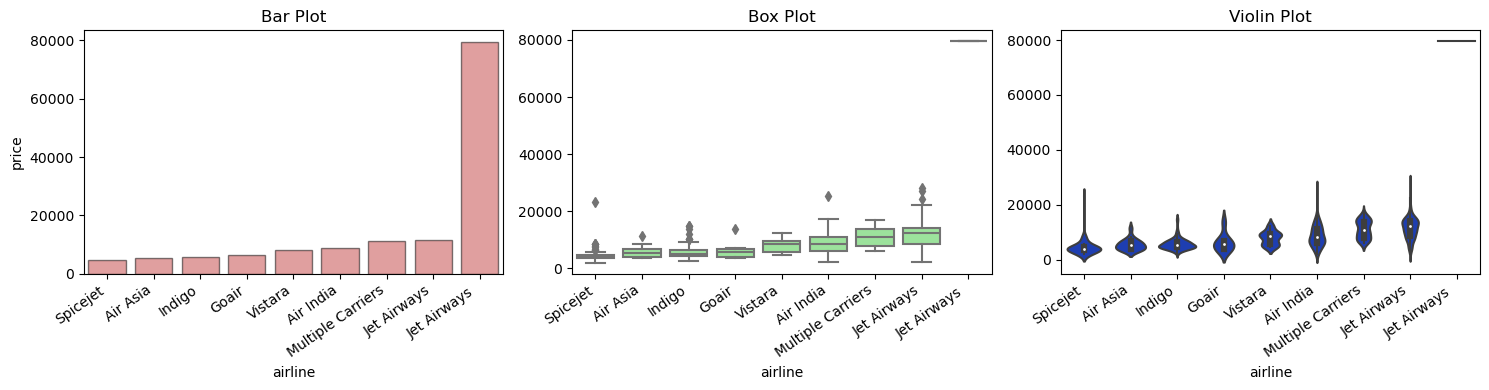

In [55]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [57]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 108.44868834075967
- p-value              : 3.1574958344167694e-113
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 299.1952503294773
- p-value              : 6.108543944754778e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


AttributeError: module 'eda_helper_functions' has no attribute 'rotate_x'

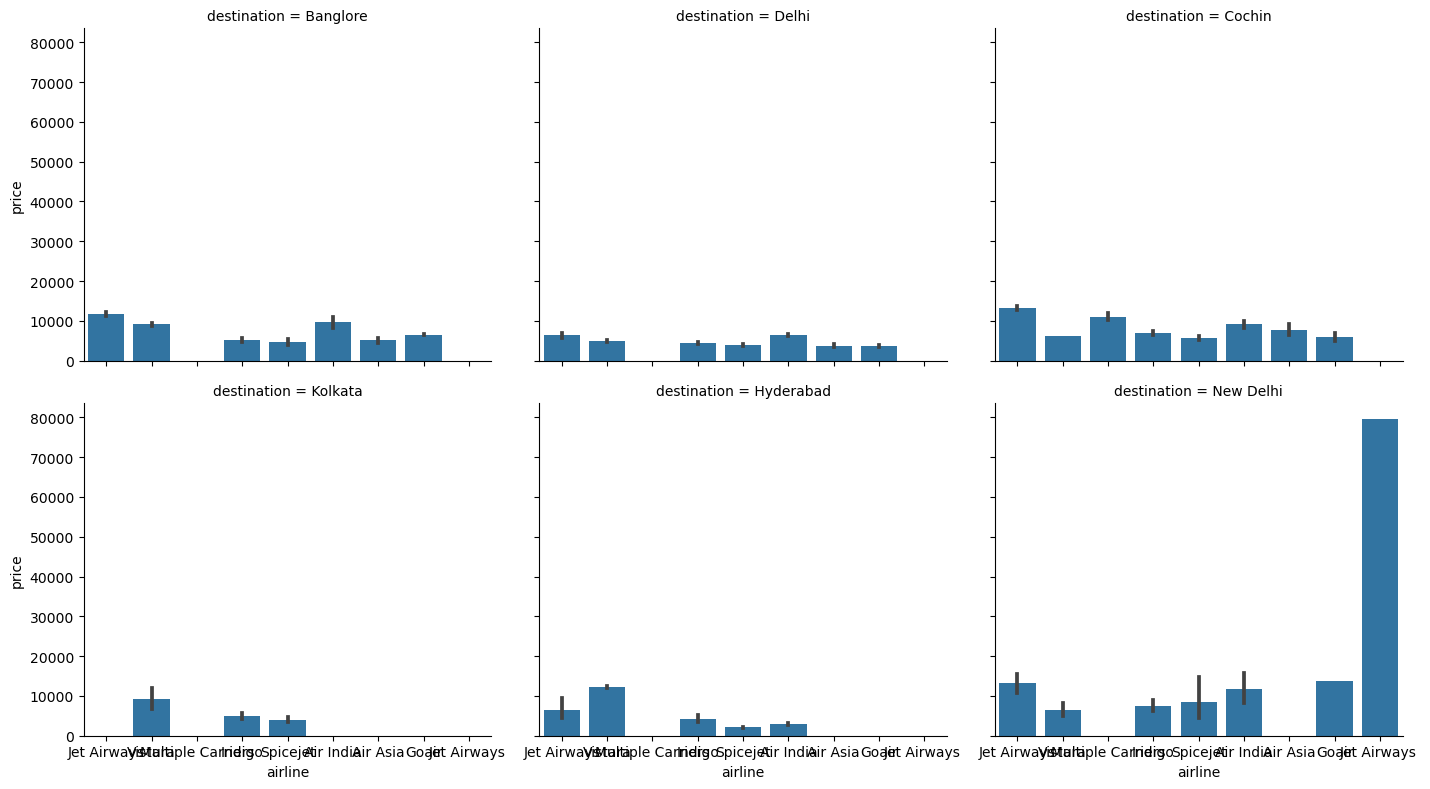

In [65]:
airline_grid=sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)
airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_x;labels(ax)

    
    


In [67]:
train.date_of_journey

0     2019-05-06
1     2019-04-06
2     2019-03-06
3     2019-06-12
4     2019-06-21
         ...    
635   2019-05-01
636   2019-03-18
637   2019-05-18
638   2019-06-21
639   2019-05-24
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

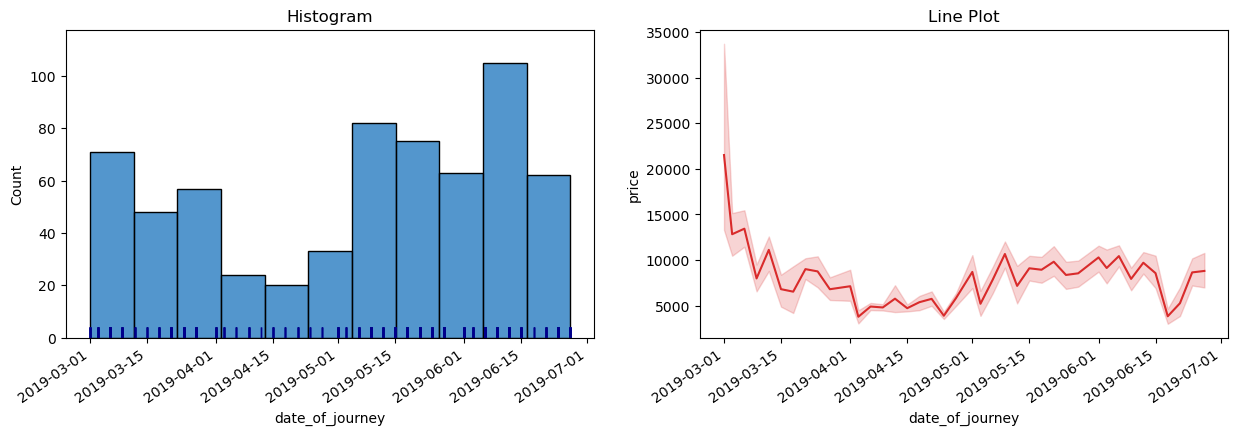

In [71]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

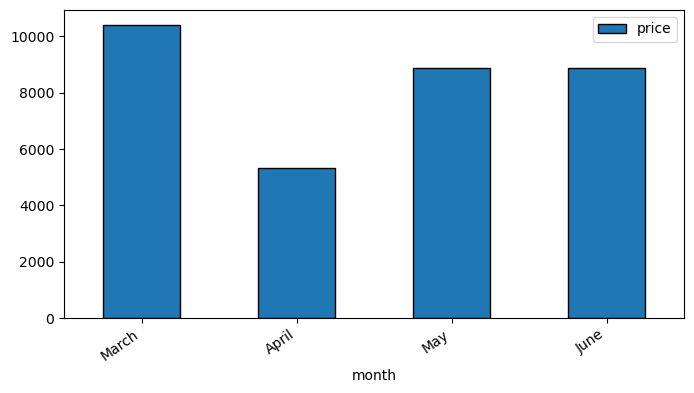

In [77]:
(
        train
        .groupby(pd.Grouper(key="date_of_journey",freq="M"))
        .price.mean()
        .to_frame()
        .set_axis(["March","April","May","June"],axis=0)
        .rename_axis(index="month")
        .plot(
                kind="bar",
                figsize=(8,4),
                edgecolor="black"
        )
)

ax= plt.gca()
eda_helper_functions.rotate_xlabels(ax)

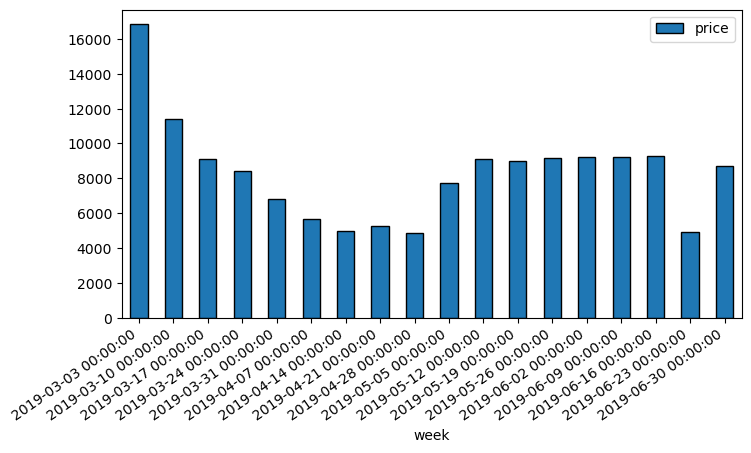

In [81]:
(
        train
        .groupby(pd.Grouper(key="date_of_journey",freq="W"))
        .price.mean()
        .to_frame()
        .rename_axis(index="week")
        .plot(
                kind="bar",
                figsize=(8,4),
                edgecolor="black"
        )
)

ax= plt.gca()
eda_helper_functions.rotate_xlabels(ax)

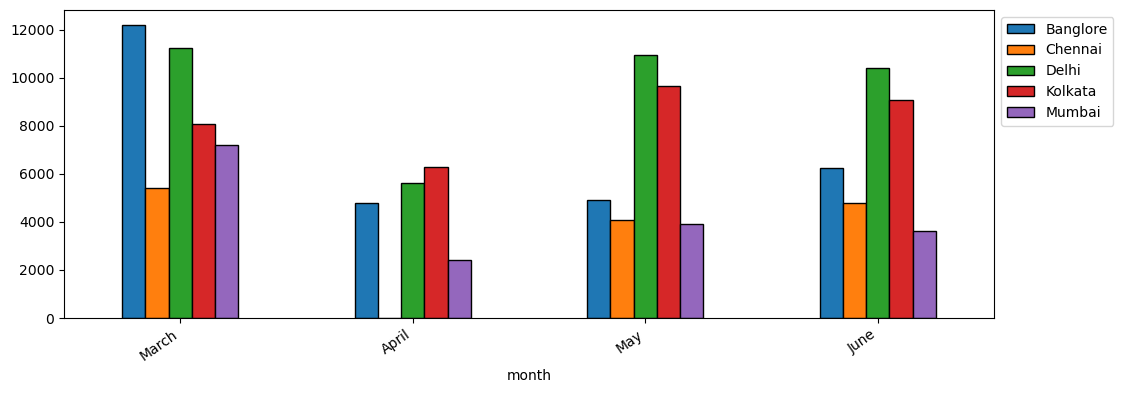

In [83]:
(
        train
        .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
        .price.mean()
        .unstack(fill_value=0)
        .set_axis(["March","April","May","June"],axis=0)
        .rename_axis(index="month")
        .plot(
                kind="bar",
                figsize=(12,4),
                edgecolor="black"
        )
)

ax= plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
) 
eda_helper_functions.rotate_xlabels(ax)

In [85]:
train.dep_time

0     2024-06-19 17:00:00
1     2024-06-19 09:45:00
2     2024-06-19 11:30:00
3     2024-06-19 14:00:00
4     2024-06-19 11:35:00
              ...        
635   2024-06-19 06:55:00
636   2024-06-19 08:50:00
637   2024-06-19 22:15:00
638   2024-06-19 17:45:00
639   2024-06-19 21:10:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

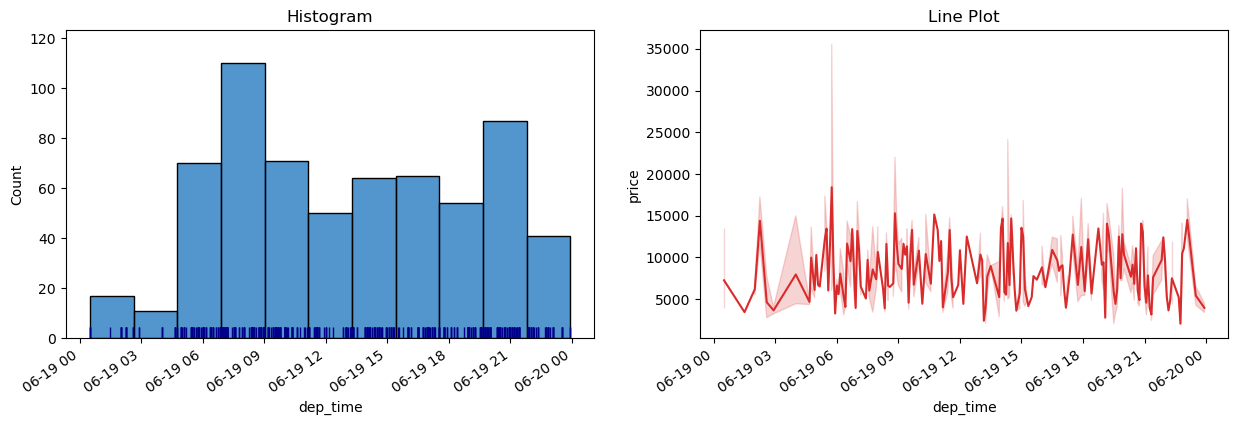

In [87]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

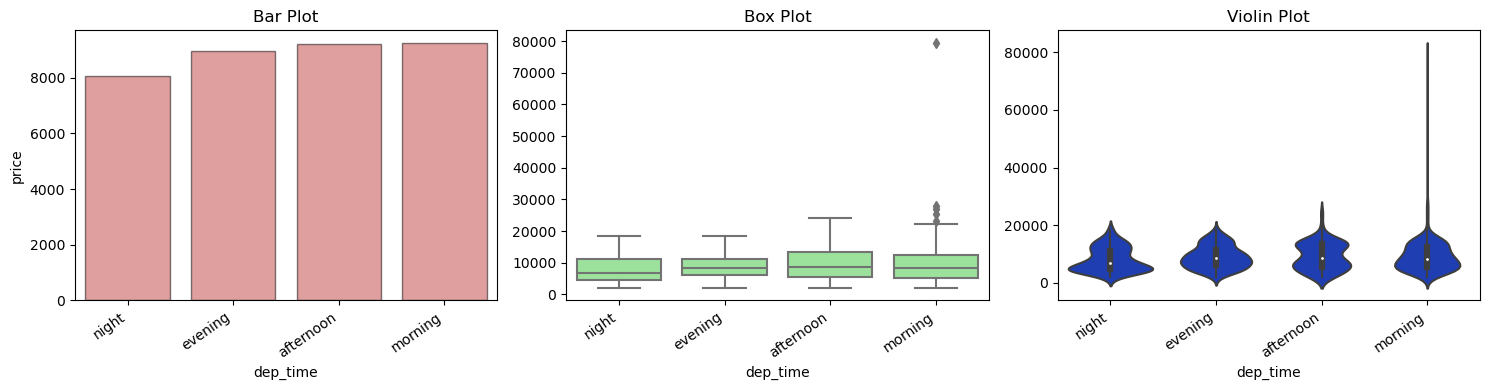

In [93]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
            df_.dep_time.dt.hour.between(12,15,inclusive="left"),
            df_.dep_time.dt.hour.between(16,20, inclusive="left")],
           ["morning","afternoon","evening"],
           default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price", "dep_time")
)

In [95]:
train.duration

0       395
1       170
2      1015
3       690
4       145
       ... 
635     155
636     875
637     155
638     140
639     175
Name: duration, Length: 640, dtype: int64

In [97]:
eda_helper_functions.num_summary(train,"duration")

0       395
1       170
2      1015
3       690
4       145
       ... 
635     155
636     875
637     155
638     140
639     175
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,455.0
75,930.0
90,1447.5
95,1615.0
99,1987.2


,value
mean,621.578125
trimmed mean (5%),586.588542
trimmed mean (10%),555.888672
median,455.000000


,value
var,262720.040835
std,512.562231
IQR,760.000000
mad,295.000000
coef_variance,0.824614


,value
skewness,0.930433
kurtosis,-0.129159


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.3973389825880145e-22
Test Statistic       : 0.8708472847938538
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 28.667179518034914
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [101]:
train.duration.quantile([0.25,0.5,0.75])

0.25    170.0
0.50    455.0
0.75    930.0
Name: duration, dtype: float64

In [103]:
eda_helper_functions.num_summary(train,"duration")

0       395
1       170
2      1015
3       690
4       145
       ... 
635     155
636     875
637     155
638     140
639     175
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,455.0
75,930.0
90,1447.5
95,1615.0
99,1987.2


,value
mean,621.578125
trimmed mean (5%),586.588542
trimmed mean (10%),555.888672
median,455.000000


,value
var,262720.040835
std,512.562231
IQR,760.000000
mad,295.000000
coef_variance,0.824614


,value
skewness,0.930433
kurtosis,-0.129159


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.3973389825880145e-22
Test Statistic       : 0.8708472847938538
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 28.667179518034914
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


TypeError: Got both 'edgecolor' and 'edgecolors', which are aliases of one another

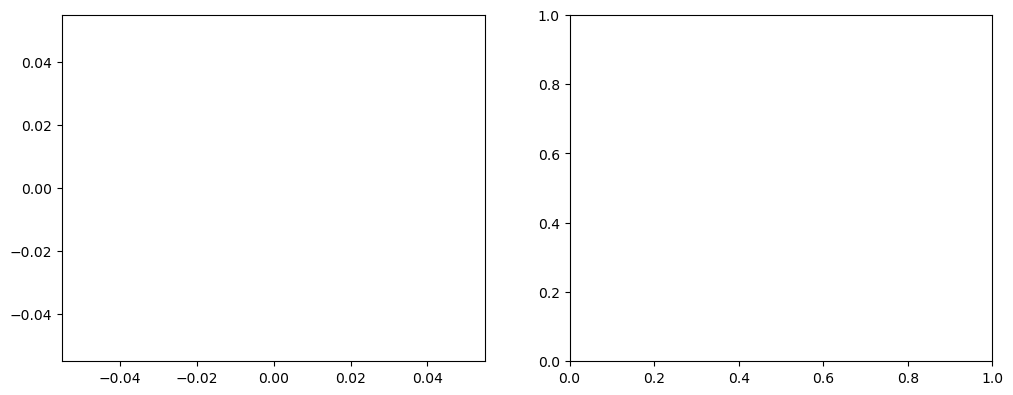

In [137]:
'''eda_helper_functions.num_bivar_plots(
        train,
        "duration",
        "price",
        hexbin_kwargs=dict(
                yscale="log",
                gridsize=20,
                cmap="Blue"
        )
)'''

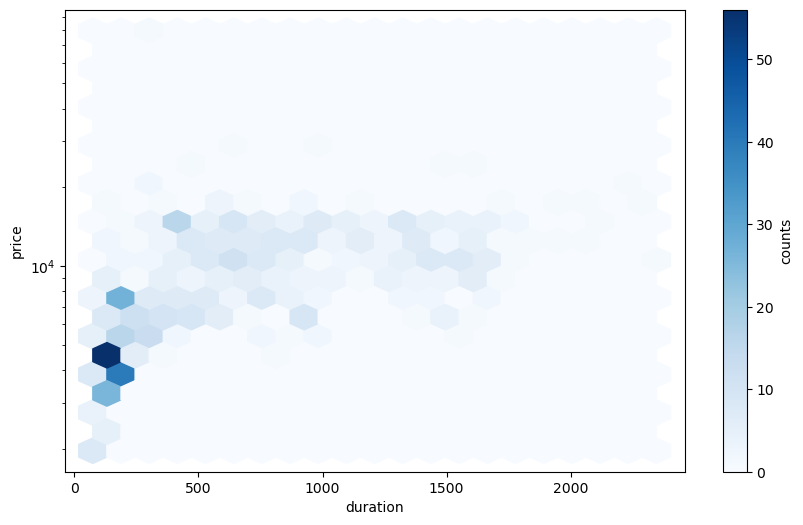

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

def num_bivar_plots(df, col1, col2, hexbin_kwargs=None):
    if hexbin_kwargs is None:
        hexbin_kwargs = {}
        
    # Remove one of the aliases if both are present
    if 'edgecolor' in hexbin_kwargs:
        hexbin_kwargs.pop('edgecolors', None)
    if 'edgecolors' in hexbin_kwargs:
        hexbin_kwargs.pop('edgecolor', None)

    plt.figure(figsize=(10, 6))
    hb = plt.hexbin(df[col1], df[col2], **hexbin_kwargs)
    cb = plt.colorbar(hb)
    cb.set_label('counts')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Sample usage
# Assuming 'train' is your DataFrame
num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)


In [109]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4740586039726382
- p-value              : 3.6011286614494535e-37
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7181542519693042
- p-value              : 1.5170422519276835e-102
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


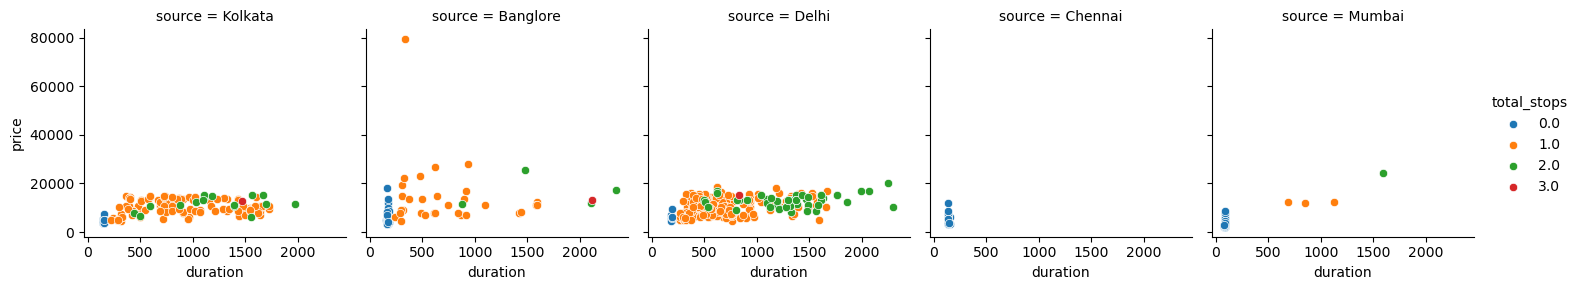

In [115]:
duration_grid= sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration", "price")
duration_grid.add_legend()


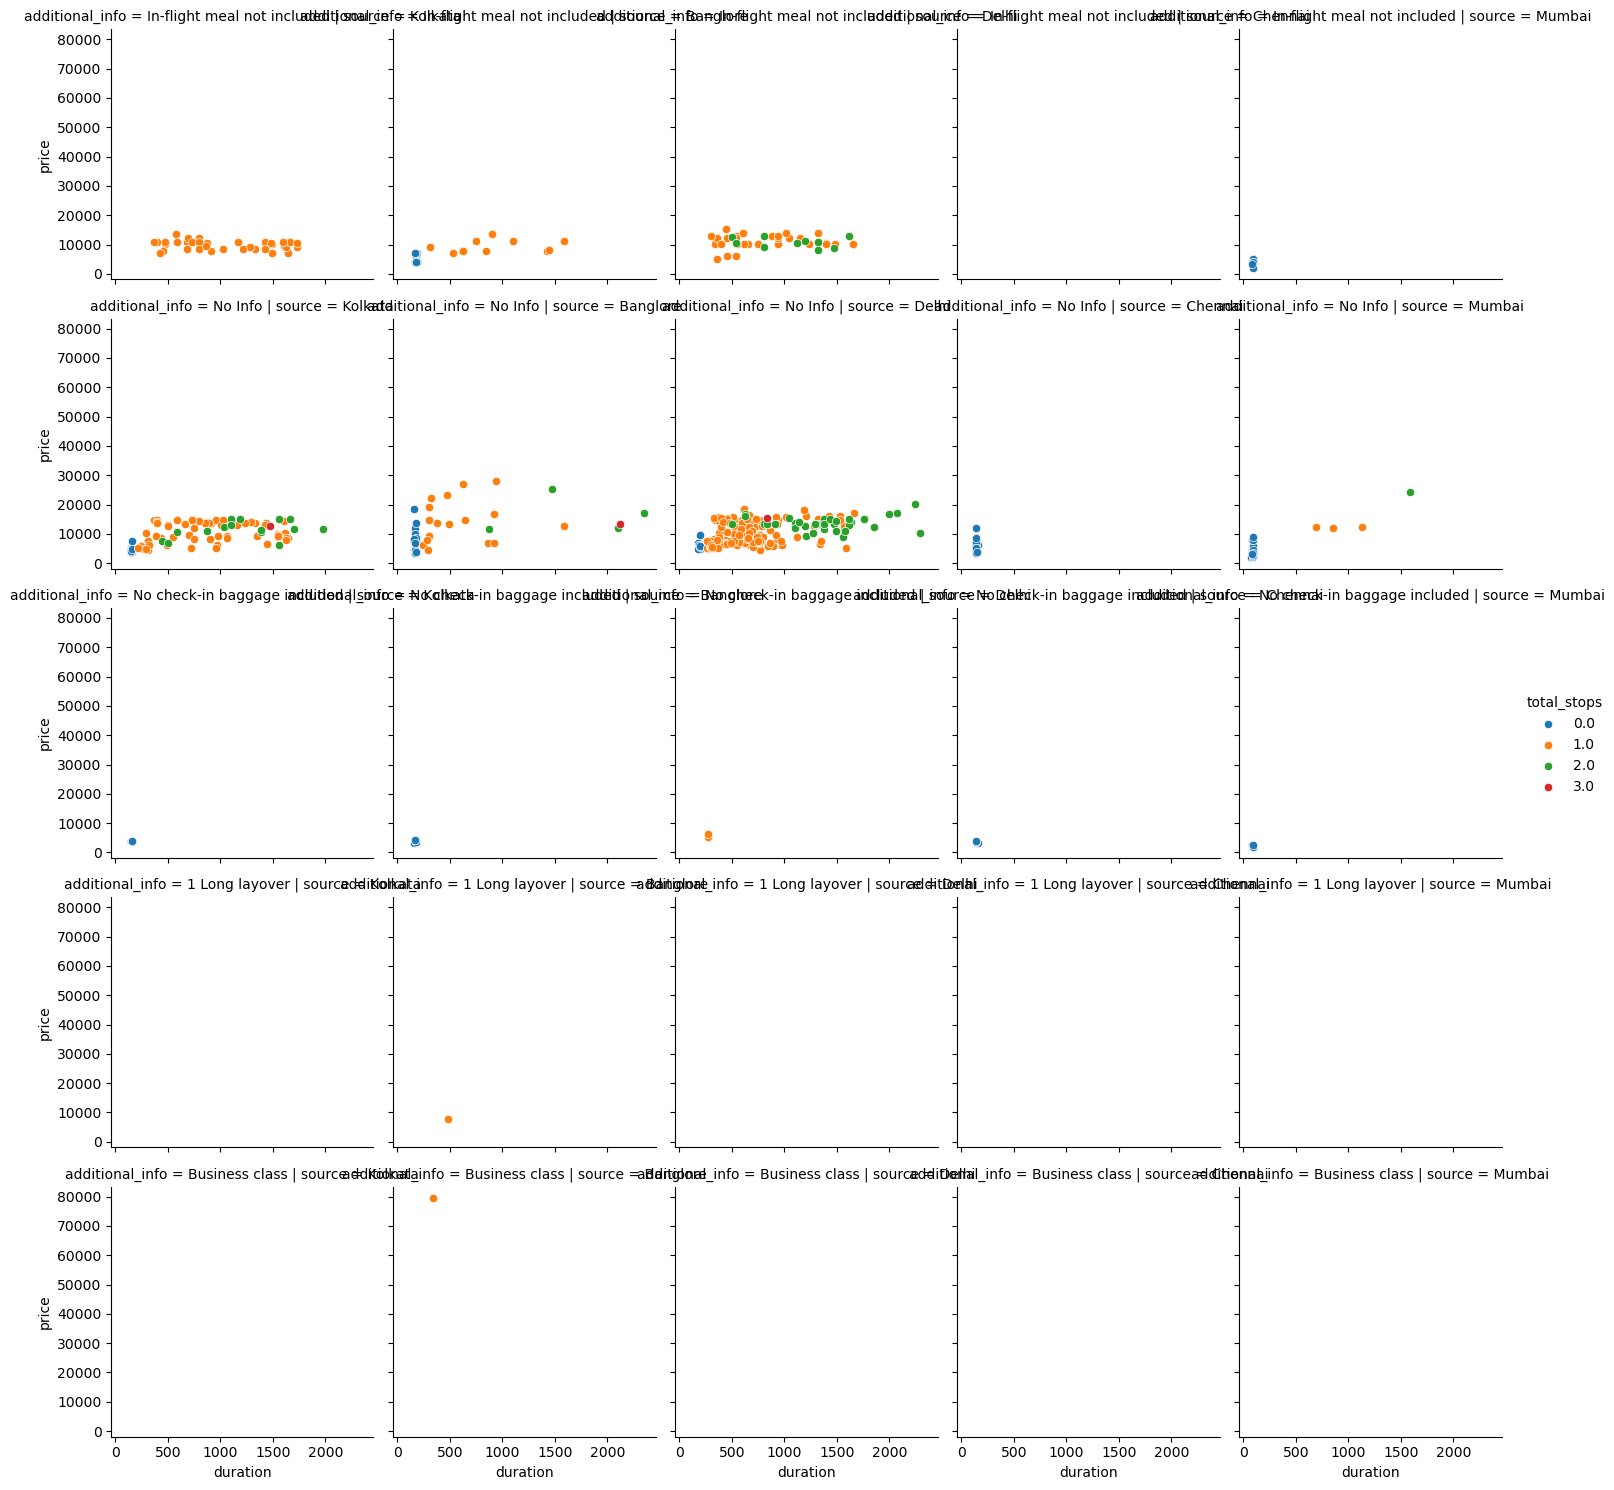

In [117]:
duration_grid= sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",
    hue="total_stops",
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration", "price")
duration_grid.add_legend()

In [125]:
eda_helper_functions.cat_summary(train,"additional_info")


0       In-flight meal not included
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
635    No check-in baggage included
636                         No Info
637                         No Info
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,495


,count,percentage
category,,
No Info,495,0.773438
In-flight meal not included,116,0.181250
No check-in baggage included,27,0.042188
1 Long layover,1,0.001563
Business class,1,0.001563


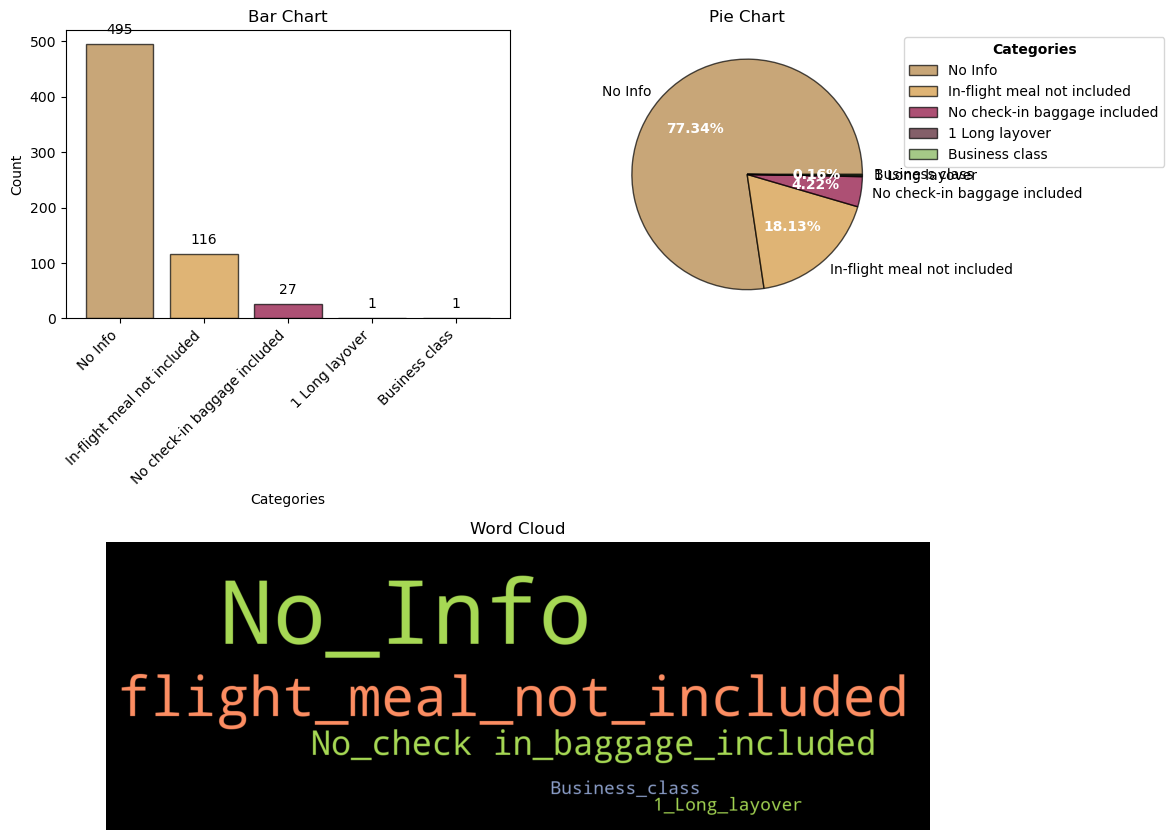

In [127]:
eda_helper_functions.cat_univar_plots(train,"additional_info")

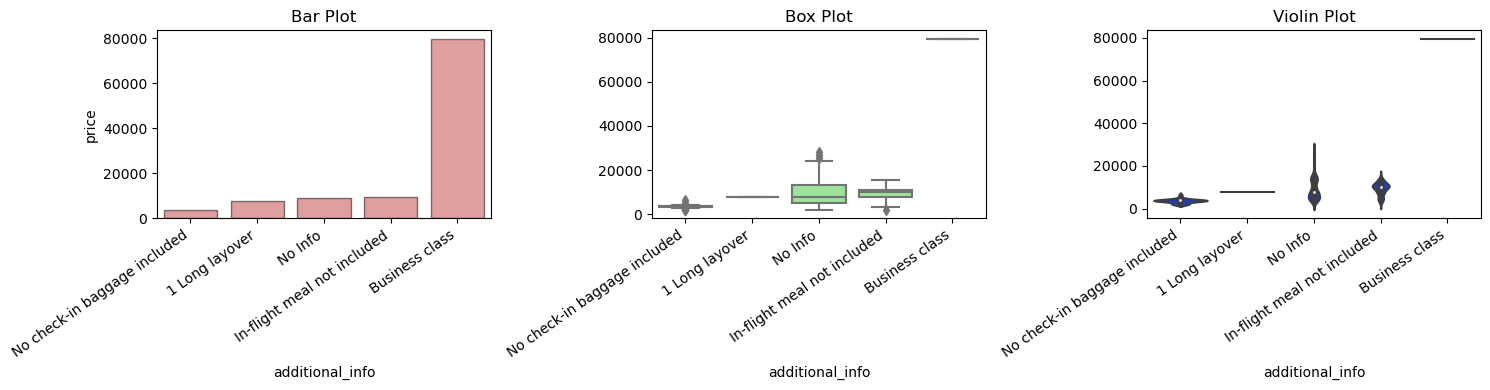

In [129]:
eda_helper_functions.num_cat_bivar_plots(train,"price","additional_info")

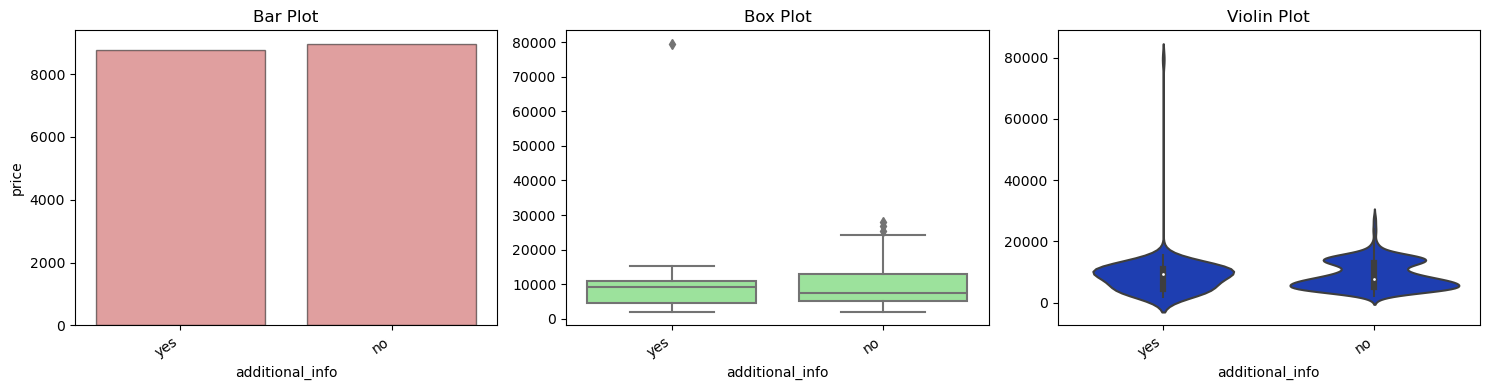

In [133]:
(
    train
    .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"),"no","yes"))
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","additional_info")
    
)

In [143]:
from ydata_profiling import ProfileReport


In [141]:
pip install ydata-profiling


     ---------------------------------------- 0.0/109.4 kB ? eta -:--:--
     ------------------------------------- -- 102.4/109.4 kB ? eta -:--:--
     -------------------------------------- 109.4/109.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   --------------------------------------  358.4/359.5 kB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 359.5/359.5 kB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------------- 296.5/296.5 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   ---------------------------------- ---- 583.7/667.1 kB 18.5 MB/s et

DEPRECATION: Loading egg at c:\users\win\anaconda3\lib\site-packages\mlproject-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  You can safely remove it manually.


In [145]:
report =ProfileReport(train)


In [147]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]